In [2]:
import rich as r

print = r.print

# Máquina Desregulada?

Considere que uma máquina de preenchimento de garrafas está configurada para preencher cada garrafa com **500 ml de vinho**. O fabricante suspeita que essa máquina está preenchendo as garrafas com valores **a menor**. Ele então coleta uma amostra de **20 garrafas** preenchidas a partir da linha de produção e mede cuidadosamente o volume em cada uma delas. Os resultados obtidos nessas medições estão a seguir (**valores em mililitros**):

```
484.11, 459.49, 471.38, 512.01, 494.48, 528.63, 493.64, 485.03, 473.88, 501.59,  
502.85, 538.08, 465.68, 495.03, 475.32, 529.41, 518.13, 464.32, 449.08, 489.27
```

## Objetivo

Verificar a alegação de que a máquina está desregulada, conforme a suspeita do fabricante.

### (i) Verificação da Normalidade

Os procedimentos paramétricos de testes de hipóteses sobre uma amostra presumem que os dados seguem uma distribuição **aproximadamente normal**. Para verificar essa suposição, utilize **dois testes de normalidade**:

- **Teste de Shapiro-Wilk**
- **QQ-Plot (Quantile-Quantile Plot)**  

Utilize um **nível de significância de α = 0.05**.

### (ii) Formulação das Hipóteses

Formule as hipóteses nula e alternativa de forma consistente com o enunciado.

- \( H_0 \): A máquina está preenchendo corretamente (\( \mu \geq 500 \))
- \( H_A \): A máquina está preenchendo **menos** do que o esperado (\( \mu < 500 \))

### (iii) Teste de Hipótese

A **variância da população é desconhecida**, portanto utilize um teste adequado para essa situação.

- Realize o **teste t de Student para uma amostra**.
- Utilize um **nível de significância de 1% (\( \alpha = 0.01 \))**.
- Apresente a análise e conclusão baseadas nos resultados obtidos.

Teste de Shapiro-Wilk: Estatística=0.9733, p-valor=0.8223

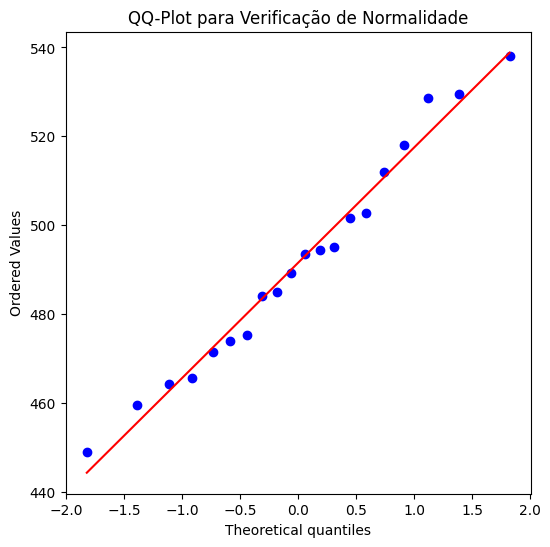

Teste t de Student para uma amostra:

Estatística t=-1.5205, p-valor=0.0724

Não há evidências suficientes para afirmar que a máquina está preenchendo menos do que 500 ml.

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Dados fornecidos (convertidos para mililitros)
dados = np.array(
    [
        484.11,
        459.49,
        471.38,
        512.01,
        494.48,
        528.63,
        493.64,
        485.03,
        473.88,
        501.59,
        502.85,
        538.08,
        465.68,
        495.03,
        475.32,
        529.41,
        518.13,
        464.32,
        449.08,
        489.27,
    ]
)

# Passo 1: Teste de Normalidade (Shapiro-Wilk)
shapiro_test = stats.shapiro(dados)
print(
    f"Teste de Shapiro-Wilk: Estatística={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue:.4f}"
)

# Passo 1: Teste QQ-Plot
plt.figure(figsize=(6, 6))
stats.probplot(dados, dist="norm", plot=plt)
plt.title("QQ-Plot para Verificação de Normalidade")
plt.show()

# Passo 2: Teste t para uma amostra
media_populacao = 500  # Valor de referência
alpha = 0.01  # Nível de significância

# Teste t unilateral à esquerda
t_stat, p_valor = stats.ttest_1samp(dados, media_populacao, alternative="less")
print(f"\nTeste t de Student para uma amostra:")
print(f"Estatística t={t_stat:.4f}, p-valor={p_valor:.4f}")

# Conclusão do teste
if p_valor < alpha:
    print(
        "\nRejeitamos H0: A máquina está preenchendo menos do que 500 ml (nível de 1% de significância)."
    )
else:
    print(
        "\nNão há evidências suficientes para afirmar que a máquina está preenchendo menos do que 500 ml."
    )

# **questão: 2 - Um estilo diferente ajuda?**  

O conjunto fornecido no arquivo `golfe.csv` lista as pontuações de uma rodada para 75 membros selecionados aleatoriamente em um campo de golfe, primeiro usando seus próprios tacos originais e, dois meses depois, depois de usar novos tacos com um design experimental.  

Denote:  
- A **População 1** como todos os jogadores de golfe que usam seus próprios tacos originais.  
- A **População 2** como todos os jogadores de golfe que usam os tacos do novo estilo.  

Agora responda aos itens abaixo.  

## **(i) Verificação da Normalidade**  
Os procedimentos paramétricos de testes de hipóteses sobre duas amostras que estudamos em nosso curso presumem que as amostras a serem usadas são provenientes de uma distribuição aproximadamente normal.  

Para cada uma das amostras fornecidas, verifique essa hipótese usando **dois testes de normalidade** estudados no curso. Para isso, use um nível de significância igual a **5%**.  

## **(ii) Aplicação do Teste de Hipóteses**  
Agora, aplique o **teste de hipóteses** propriamente dito. Forneça a descrição detalhada dos **quatro passos de aplicação do teste**.  

- Repare que a variância da população **não é conhecida**. Sendo assim, certifique-se de usar o **teste de hipóteses adequado** para essa situação.  
- Apresente sua análise para o **nível de significância igual a 1%**.  
- O teste de hipóteses deve ser aplicado **três vezes**, pois existem **três pares de amostras pareadas**.  


Teste de Shapiro-Wilk (Original): Estatística=0.9005, p-valor=0.0000

Teste de Shapiro-Wilk (Novo): Estatística=0.9188, p-valor=0.0001

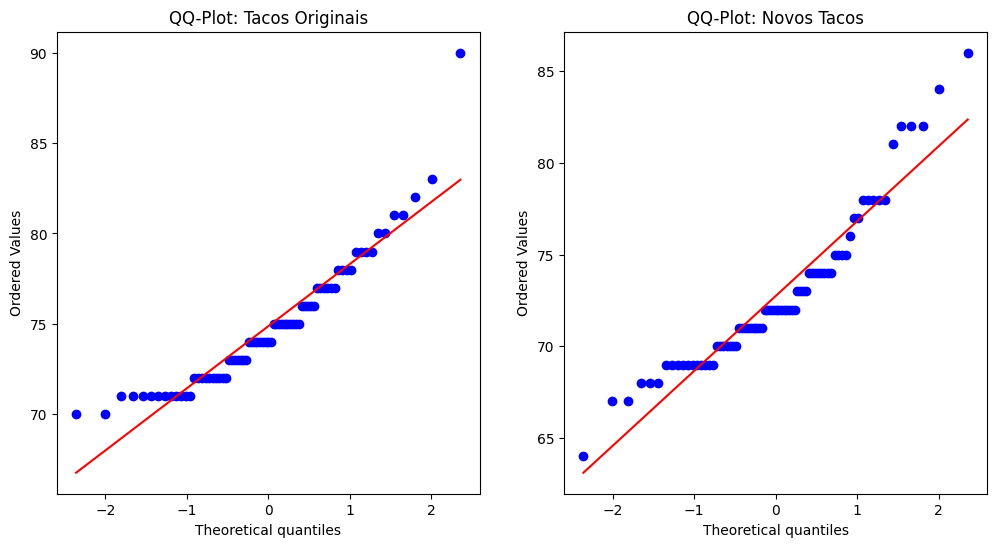

Teste t pareado:

Estatística t=6.9253, p-valor=0.0000

Conclusão: Rejeitamos H0: O novo taco alterou significativamente a pontuação.

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
df = pd.read_csv("golfe.csv", sep=";")

# Supondo que as colunas sejam 'Original' e 'Novo'
original_scores = df["Old Score"]
new_scores = df["New Score "]

# (i) Teste de Normalidade - Shapiro-Wilk
shapiro_original = stats.shapiro(original_scores)
shapiro_new = stats.shapiro(new_scores)

print(
    f"Teste de Shapiro-Wilk (Original): Estatística={shapiro_original.statistic:.4f}, p-valor={shapiro_original.pvalue:.4f}"
)
print(
    f"Teste de Shapiro-Wilk (Novo): Estatística={shapiro_new.statistic:.4f}, p-valor={shapiro_new.pvalue:.4f}"
)

# (i) Teste de Normalidade - QQ-Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
stats.probplot(original_scores, dist="norm", plot=axs[0])
axs[0].set_title("QQ-Plot: Tacos Originais")
stats.probplot(new_scores, dist="norm", plot=axs[1])
axs[1].set_title("QQ-Plot: Novos Tacos")
plt.show()

# (ii) Teste t pareado
alpha = 0.01  # Nível de significância
t_stat, p_valor = stats.ttest_rel(original_scores, new_scores)

print("\nTeste t pareado:")
print(f"Estatística t={t_stat:.4f}, p-valor={p_valor:.4f}")

# Conclusão
teste_conclusao = (
    "Rejeitamos H0: O novo taco alterou significativamente a pontuação."
    if p_valor < alpha
    else "Não há evidências suficientes para afirmar que o novo taco alterou a pontuação."
)
print("\nConclusão:", teste_conclusao)

# **Questão 3 - Transmissões: automática versus manual**  

Considere o conjunto de dados `mtcars.csv`. Esse conjunto apresenta informações sobre modelos de carros e contém várias colunas. Entretanto, para essa parte do trabalho, duas delas são relevantes:  

- **`am` (Tipo de transmissão)**: Indica o sistema de transmissão usado no modelo de automóvel:  
  - `0` = Automática  
  - `1` = Manual  
  - Assim, esse conjunto pode ser dividido em **duas amostras independentes**: carros com transmissão automática e carros com transmissão manual.  

- **`mpg` (Miles per Gallon - Milhas por Galão)**: Mede a eficiência de consumo de combustível para cada modelo de carro listado.  

Com base nessas informações, responda aos itens abaixo.  

## **(i) Verificação da Normalidade**  
Os procedimentos paramétricos de testes de hipóteses sobre duas amostras que estudamos no curso presumem que as amostras são provenientes de uma **distribuição aproximadamente normal**.  

Para cada uma das amostras fornecidas, verifique essa hipótese usando **dois testes de normalidade** estudados no curso. Utilize um nível de significância de **5%**.  

## **(ii) Intervalo de Confiança para a Diferença das Médias**  
Presumindo que os dados da coluna `mpg` seguem uma distribuição normal, determine um **intervalo de confiança de 95%** para a diferença entre as **médias** dos modelos de carros que possuem transmissão **automática** e os que possuem transmissão **manual**.  

## **(iii) Teste de Hipótese: Eficiência de Combustível**  
Suponha que, ao analisar os dados fornecidos, alguém levantou a alegação de que **carros automáticos e manuais não apresentam a mesma eficiência em consumo de combustível**.  

Em particular, há uma suspeita de que **carros com transmissão manual consomem menos combustível** (ou seja, têm **mpg maior**).  

Aplique um **teste de hipótese** para verificar essa suspeita.  

- **Hipóteses Estatísticas**  
  - \( H_0 \) (Hipótese Nula): O consumo médio de combustível dos dois tipos de transmissão é **igual**.  
  - \( H_A \) (Hipótese Alternativa): Carros com transmissão **manual** consomem **menos** combustível (têm **mpg maior**).  

- Descreva detalhadamente **os quatro passos de aplicação do teste**.  
- Como são fornecidas **duas amostras independentes**, utilize o **teste de hipótese adequado** para essa situação.  
- Apresente sua análise para um **nível de significância de 5%**.  


Teste de Shapiro-Wilk (Automático): Estatística=0.9768, p-valor=0.8987

Teste de Shapiro-Wilk (Manual): Estatística=0.9458, p-valor=0.5363

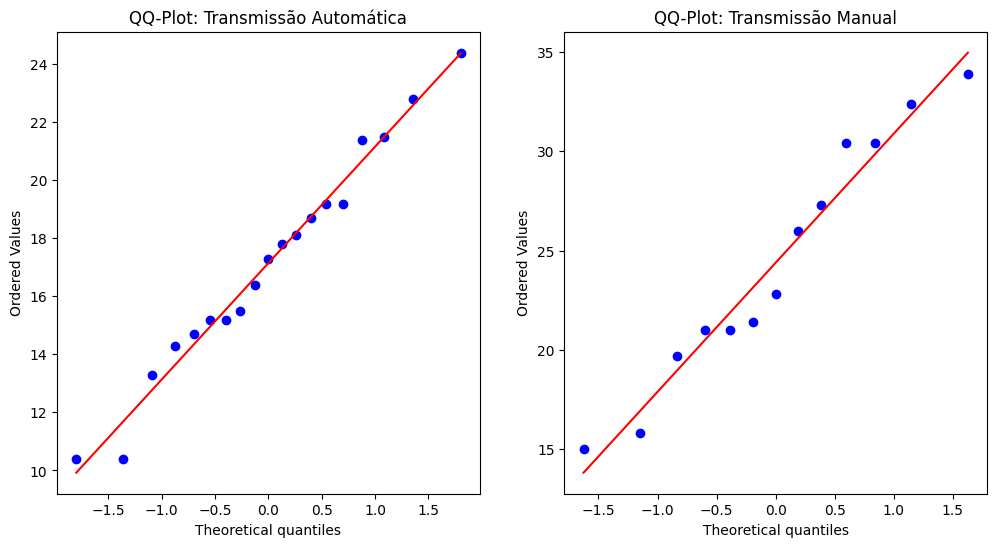

Intervalo de Confiança (95%) para a diferença das médias: (np.float64(3.317236525373584), 
np.float64(11.172642017136528))

Teste t para duas amostras independentes:

Estatística t=4.1061, p-valor=0.0001

Conclusão: Rejeitamos H0: Carros manuais consomem menos combustível.

In [5]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
df = pd.read_csv("mtcars.csv")

# Separar os grupos
auto_mpg = df[df["am"] == 0]["mpg"]  # Transmissão automática
manual_mpg = df[df["am"] == 1]["mpg"]  # Transmissão manual

# (i) Teste de Normalidade - Shapiro-Wilk
shapiro_auto = stats.shapiro(auto_mpg)
shapiro_manual = stats.shapiro(manual_mpg)

print(
    f"Teste de Shapiro-Wilk (Automático): Estatística={shapiro_auto.statistic:.4f}, p-valor={shapiro_auto.pvalue:.4f}"
)
print(
    f"Teste de Shapiro-Wilk (Manual): Estatística={shapiro_manual.statistic:.4f}, p-valor={shapiro_manual.pvalue:.4f}"
)

# (i) Teste de Normalidade - QQ-Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
stats.probplot(auto_mpg, dist="norm", plot=axs[0])
axs[0].set_title("QQ-Plot: Transmissão Automática")
stats.probplot(manual_mpg, dist="norm", plot=axs[1])
axs[1].set_title("QQ-Plot: Transmissão Manual")
plt.show()

# (ii) Intervalo de Confiança para a Diferença das Médias
media_diff = np.mean(manual_mpg) - np.mean(auto_mpg)
std_err = np.sqrt(
    (np.var(manual_mpg, ddof=1) / len(manual_mpg))
    + (np.var(auto_mpg, ddof=1) / len(auto_mpg))
)
intervalo = stats.t.interval(
    0.95, df=len(auto_mpg) + len(manual_mpg) - 2, loc=media_diff, scale=std_err
)

print(f"\nIntervalo de Confiança (95%) para a diferença das médias: {intervalo}")

# (iii) Teste de Hipótese - Teste t para duas amostras independentes
alpha = 0.05  # Nível de significância
t_stat, p_valor = stats.ttest_ind(manual_mpg, auto_mpg, alternative="greater")

print("\nTeste t para duas amostras independentes:")
print(f"Estatística t={t_stat:.4f}, p-valor={p_valor:.4f}")

# Conclusão
teste_conclusao = (
    "Rejeitamos H0: Carros manuais consomem menos combustível."
    if p_valor < alpha
    else "Não há evidências suficientes para afirmar que carros manuais consomem menos combustível."
)
print("\nConclusão:", teste_conclusao)

In [6]:
import numpy as np
import scipy.stats as stats

# Dados fornecidos
compactos = np.array([20, 25, 25, 20, 22, 22, 24, 26, 20, 24, 24, 23, 20, 23, 21, 21])
medios = np.array(
    [
        18,
        19,
        22,
        22,
        19,
        16,
        21,
        21,
        21,
        20,
        17,
        18,
        18,
        17,
        19,
        19,
        18,
        21,
        23,
        19,
        22,
        20,
    ]
)
grandes = np.array(
    [19, 16, 16, 17, 20, 20, 20, 18, 18, 19, 19, 15, 18, 17, 15, 18, 17, 18, 18, 17]
)


# Teste de Normalidade (Shapiro-Wilk)
def normality_test(*samples):
    for i, sample in enumerate(samples, start=1):
        stat, p = stats.shapiro(sample)
        print(f"Grupo {i}: Teste de Shapiro-Wilk: p-valor = {p:.4f}")
        if p < 0.05:
            print("  -> Rejeitamos a normalidade")
        else:
            print("  -> Não rejeitamos a normalidade")


print("Teste de Normalidade:")
normality_test(compactos, medios, grandes)

# Teste de Homogeneidade de Variâncias (Levene)
levene_stat, levene_p = stats.levene(compactos, medios, grandes)
print(f"\nTeste de Levene para homogeneidade de variâncias: p-valor = {levene_p:.4f}")
if levene_p < 0.05:
    print("  -> As variâncias não são homogêneas")
else:
    print("  -> As variâncias são homogêneas")

# Teste ANOVA (se as condições forem satisfeitas)
if levene_p >= 0.05:
    f_stat, p_value = stats.f_oneway(compactos, medios, grandes)
    print(f"\nTeste ANOVA: F = {f_stat:.4f}, p-valor = {p_value:.4f}")
    if p_value < 0.05:
        print("  -> Rejeitamos H0: as médias das categorias são diferentes")
    else:
        print("  -> Não rejeitamos H0: não há evidências de diferença nas médias")

Teste de Normalidade:

Grupo 1: Teste de Shapiro-Wilk: p-valor = 0.1366

-> Não rejeitamos a normalidade

Grupo 2: Teste de Shapiro-Wilk: p-valor = 0.4694

-> Não rejeitamos a normalidade

Grupo 3: Teste de Shapiro-Wilk: p-valor = 0.2041

-> Não rejeitamos a normalidade

Teste de Levene para homogeneidade de variâncias: p-valor = 0.2225

-> As variâncias são homogêneas

Teste ANOVA: F = 30.6432, p-valor = 0.0000

-> Rejeitamos H0: as médias das categorias são diferentes

In [7]:
# Situação-problema II
# Carregar os dados do arquivo
df = pd.read_excel("data9.xls")

# Separando os grupos de custos
math_costs = df[df["Cource"].str.contains("MATH")]["Cost"].values
comp_costs = df[df["Cource"].str.contains("COMP")]["Cost"].values
chem_costs = df[df["Cource"].str.contains("CHEM")]["Cost"].values

# Teste de Normalidade
print("\nTeste de Normalidade para Situação-problema II:")
normality_test(math_costs, comp_costs, chem_costs)

# Teste de Homogeneidade de Variâncias
levene_stat, levene_p = stats.levene(math_costs, comp_costs, chem_costs)
print(f"\nTeste de Levene para homogeneidade de variâncias: p-valor = {levene_p:.4f}")
if levene_p < 0.01:
    print("  -> As variâncias não são homogêneas")
else:
    print("  -> As variâncias são homogêneas")

# Teste ANOVA para Situação-problema II
if levene_p >= 0.01:
    f_stat, p_value = stats.f_oneway(math_costs, comp_costs, chem_costs)
    print(
        f"\nTeste ANOVA para custos de materiais: F = {f_stat:.4f}, p-valor = {p_value:.4f}"
    )
    if p_value < 0.01:
        print("  -> Rejeitamos H0: os custos médios das disciplinas são diferentes")
    else:
        print(
            "  -> Não rejeitamos H0: não há evidências de diferença nos custos médios"
        )

Teste de Normalidade para Situação-problema II:

Grupo 1: Teste de Shapiro-Wilk: p-valor = 0.0567

-> Não rejeitamos a normalidade

Grupo 2: Teste de Shapiro-Wilk: p-valor = 0.1523

-> Não rejeitamos a normalidade

Grupo 3: Teste de Shapiro-Wilk: p-valor = 0.1963

-> Não rejeitamos a normalidade

Teste de Levene para homogeneidade de variâncias: p-valor = 0.9022

-> As variâncias são homogêneas

Teste ANOVA para custos de materiais: F = 1.4180, p-valor = 0.2597

-> Não rejeitamos H0: não há evidências de diferença nos custos médios

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# 5.1 Distribuição χ² (k = 13)

# (i) Pr(Y > 2,56)
prob_i = 1 - stats.chi2.cdf(2.56, df=13)
print(f"5.1 (i) Pr(Y > 2,56) = {prob_i:.4f}")

# (ii) Pr(2,56 < Y < 4,87)
prob_ii = stats.chi2.cdf(4.87, df=13) - stats.chi2.cdf(2.56, df=13)
print(f"5.1 (ii) Pr(2,56 < Y < 4,87) = {prob_ii:.4f}")

# (iii) Valor de y tal que Pr(Y < y) = 0.95
y = stats.chi2.ppf(0.95, df=13)
print(f"5.1 (iii) y tal que Pr(Y < y) = 0.95: {y:.4f}")

5.1 (i) Pr(Y > 2,56) = 0.9991

5.1 (ii) Pr(2,56 < Y < 4,87) = 0.0212

5.1 (iii) y tal que Pr(Y < y) = 0.95: 22.3620

In [9]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
# 5.2 Teste χ² (mtcars)

print("\n5.2 Teste de independência entre cyl e carb:")
# Importar dados mtcars
mtcars = pd.read_csv('mtcars.csv')

# Criar tabela de contingência
tabela_cont = pd.crosstab(mtcars['cyl'], mtcars['carb'])

# Realizar teste qui-quadrado
chi2, p_valor, gl, esperado = stats.chi2_contingency(tabela_cont)

print(f"\nTabela de Contingência:")
print(tabela_cont)
print(f"\nResultados do teste:")
print(f"Estatística qui-quadrado: {chi2:.4f}")
print(f"Valor-p: {p_valor:.4f}")
print(f"Graus de liberdade: {gl}")

# Conclusão
alpha = 0.05
if p_valor < alpha:
    print("\nRejeita-se H0: As variáveis são dependentes")
else:
    print("\nNão se rejeita H0: Não há evidência de dependência")

5.2 Teste de independência entre cyl e carb:

Tabela de Contingência:

carb  1  2  3  4  6  8
cyl                   
4     5  6  0  0  0  0
6     2  0  0  4  1  0
8     0  4  3  6  0  1

Resultados do teste:

Estatística qui-quadrado: 24.3889

Valor-p: 0.0066

Graus de liberdade: 10

Rejeita-se H0: As variáveis são dependentes

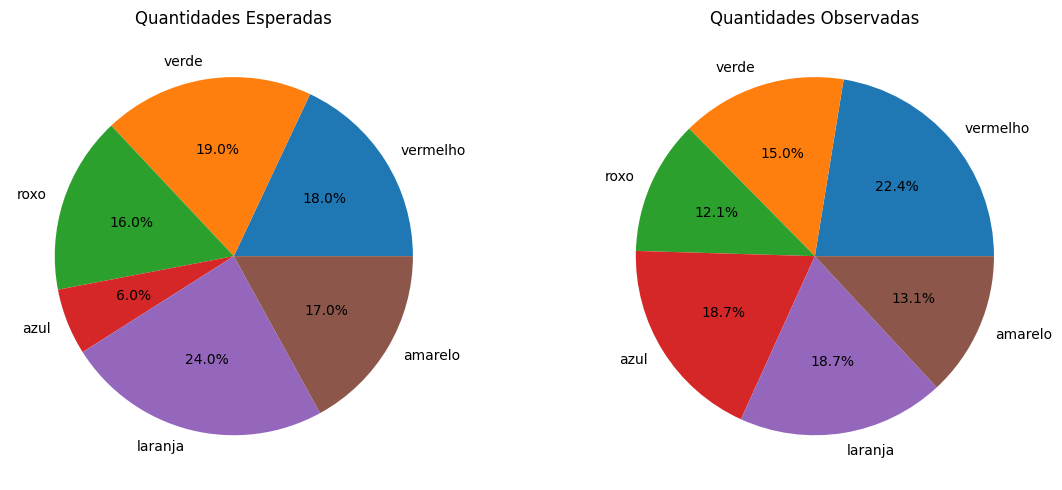

Resultados do Teste Qui-Quadrado:

Graus de liberdade: 5

Estatística qui-quadrado: 34.0270

Valor-p: 0.0000

Rejeita-se H0: Há evidência estatística de que as balinhas não são distribuídas uniformemente

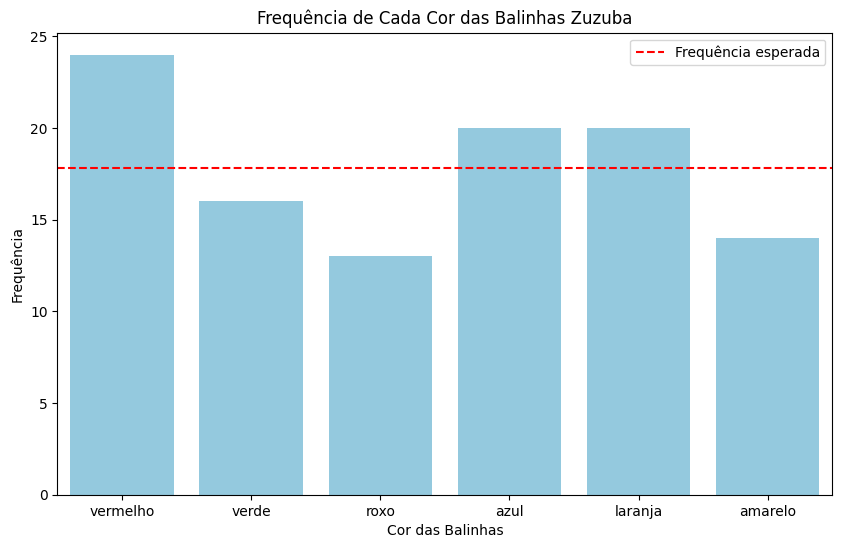

In [25]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Dados da Tabela 1
cores = ["vermelho", "verde", "roxo", "azul", "laranja", "amarelo"]
esperado = [18, 19, 16, 6, 24, 17]
observado = [24, 16, 13, 20, 20, 14]

# Criar gráficos de pizza
plt.figure(figsize=(12, 5))

# Gráfico de pizza dos valores esperados
plt.subplot(121)
plt.pie(esperado, labels=cores, autopct="%1.1f%%")
plt.title("Quantidades Esperadas")

# Gráfico de pizza dos valores observados
plt.subplot(122)
plt.pie(observado, labels=cores, autopct="%1.1f%%")
plt.title("Quantidades Observadas")

plt.tight_layout()
plt.show()

# Normalizar frequências esperadas para corresponder à soma das frequências observadas
esperado = np.array(esperado) * (np.sum(observado) / np.sum(esperado))

# Realizar teste qui-quadrado
chi2_stat, p_valor = stats.chisquare(observado, esperado)

# Graus de liberdade
gl = len(cores) - 1

print("\nResultados do Teste Qui-Quadrado:")
print(f"Graus de liberdade: {gl}")
print(f"Estatística qui-quadrado: {chi2_stat:.4f}")
print(f"Valor-p: {p_valor:.4f}")

# Conclusão
alpha = 0.10  # nível de significância de 10%
if p_valor < alpha:
    print(
        "Rejeita-se H0: Há evidência estatística de que as balinhas não são distribuídas uniformemente"
    )
else:
    print(
        "Não se rejeita H0: Não há evidência estatística de que as balinhas não são distribuídas uniformemente"
    )

# Criar gráfico de barras para frequências observadas
plt.figure(figsize=(10, 6))
sns.barplot(x=cores, y=observado, color="skyblue")
plt.axhline(
    y=np.mean(esperado), color="red", linestyle="--", label="Frequência esperada"
)
plt.title("Frequência de Cada Cor das Balinhas Zuzuba")
plt.xlabel("Cor das Balinhas")
plt.ylabel("Frequência")
plt.legend()
plt.show()

In [13]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
# 5.4 Teste χ² (tratamento)

print("\n5.4 Teste de independência do tratamento:")

# Importar dados
df = pd.read_csv('treatment.csv')

# Criar tabela de contingência
tabela_cont = pd.crosstab(df['treatment'], df['improvement'])

# Realizar teste qui-quadrado
chi2, p_valor, gl, esperado = stats.chi2_contingency(tabela_cont)

print("\nTabela de Contingência:")
print(tabela_cont)
print(f"\nResultados do teste:")
print(f"Estatística qui-quadrado: {chi2:.4f}")
print(f"Valor-p: {p_valor:.4f}")
print(f"Graus de liberdade: {gl}")

# Conclusão
alpha = 0.05
if p_valor < alpha:
    print("\nRejeita-se H0: O tratamento e a melhora são dependentes")
else:
    print("\nNão se rejeita H0: Não há evidência de dependência entre tratamento e melhora")

5.4 Teste de independência do tratamento:

Tabela de Contingência:

improvement  improved  not-improved
treatment                          
not-treated        26            29
treated            35            15

Resultados do teste:

Estatística qui-quadrado: 4.6626

Valor-p: 0.0308

Graus de liberdade: 1

Rejeita-se H0: O tratamento e a melhora são dependentes

5.5 Teste para dado de seis lados:

=== Teste de Equidade do Dado ===

Frequências observadas:

Face 1: 80 (16.0%)

Face 2: 97 (19.4%)

Face 3: 81 (16.2%)

Face 4: 82 (16.4%)

Face 5: 77 (15.4%)

Face 6: 83 (16.6%)

Frequência esperada para cada face: 83.3

Resultados do teste qui-quadrado:

Estatística qui-quadrado: 2.9440

Graus de liberdade: 5

Valor-p: 0.7086

Conclusão (α = 0.1):

Não se rejeita H0: Não há evidência estatística suficiente para concluir que o dado não é justo

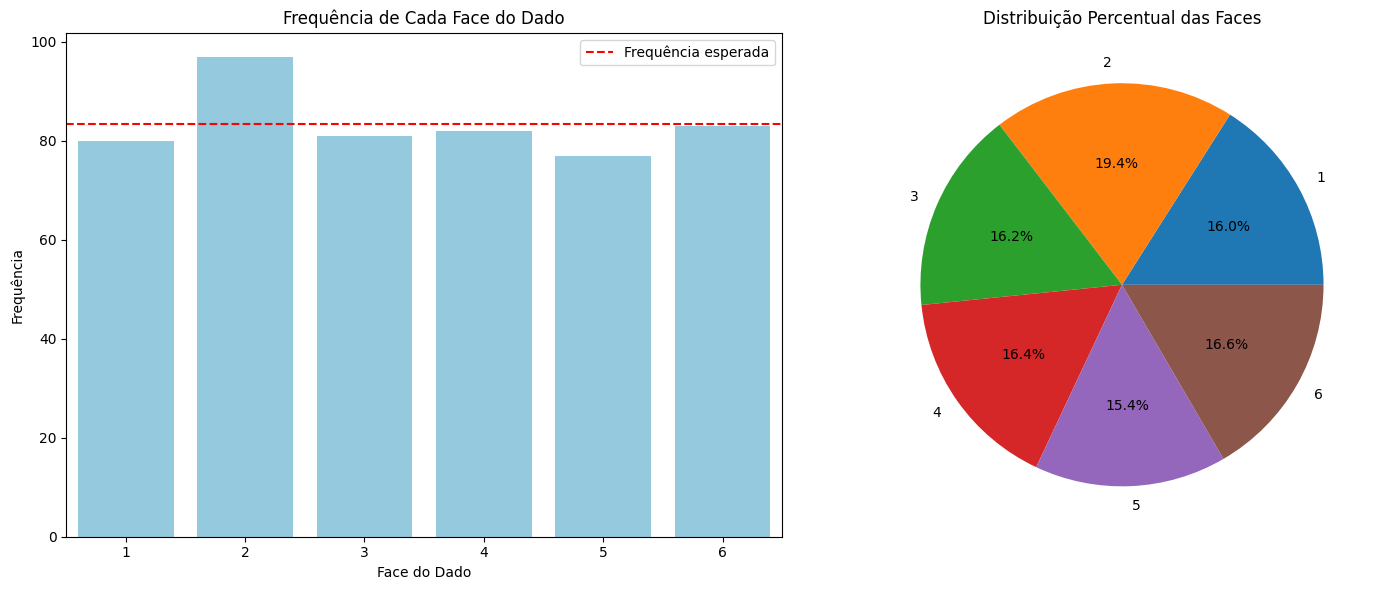

In [14]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
# 5.5 Teste χ² (dado)

print("\n5.5 Teste para dado de seis lados:")
# Importar dados
dados = pd.read_excel("data4.xls")

# Análise descritiva
contagem = dados["Die Result"].value_counts().sort_index()
esperado = np.array([len(dados) / 6] * 6)  # frequência esperada para cada face

# Criar visualização
plt.figure(figsize=(15, 6))

# Subplot 1: Gráfico de barras com frequências
plt.subplot(1, 2, 1)
sns.barplot(x=contagem.index, y=contagem.values, color="skyblue")
plt.axhline(y=esperado[0], color="red", linestyle="--", label="Frequência esperada")
plt.title("Frequência de Cada Face do Dado")
plt.xlabel("Face do Dado")
plt.ylabel("Frequência")
plt.legend()

# Subplot 2: Gráfico de pizza com percentuais
plt.subplot(1, 2, 2)
plt.pie(contagem.values, labels=contagem.index, autopct="%1.1f%%")
plt.title("Distribuição Percentual das Faces")

plt.tight_layout()

# Realizar teste qui-quadrado
chi2_stat, p_valor = stats.chisquare(contagem, esperado)
gl = len(contagem) - 1

print("=== Teste de Equidade do Dado ===")
print("\nFrequências observadas:")
for face, freq in contagem.items():
    print(f"Face {face}: {freq} ({freq/len(dados)*100:.1f}%)")

print(f"\nFrequência esperada para cada face: {esperado[0]:.1f}")

print("\nResultados do teste qui-quadrado:")
print(f"Estatística qui-quadrado: {chi2_stat:.4f}")
print(f"Graus de liberdade: {gl}")
print(f"Valor-p: {p_valor:.4f}")

# Conclusão
alpha = 0.10  # nível de significância de 10%
print(f"\nConclusão (α = {alpha}):")
if p_valor < alpha:
    print("Rejeita-se H0: Há evidência estatística de que o dado não é justo")

    # Análise adicional das discrepâncias
    print("\nAnálise das discrepâncias:")
    for face, freq in contagem.items():
        diff_perc = (freq - esperado[0]) / esperado[0] * 100
        print(
            f"Face {face}: {'+' if diff_perc > 0 else ''}{diff_perc:.1f}% em relação ao esperado"
        )
else:
    print(
        "Não se rejeita H0: Não há evidência estatística suficiente para concluir que o dado não é justo"
    )

plt.show()